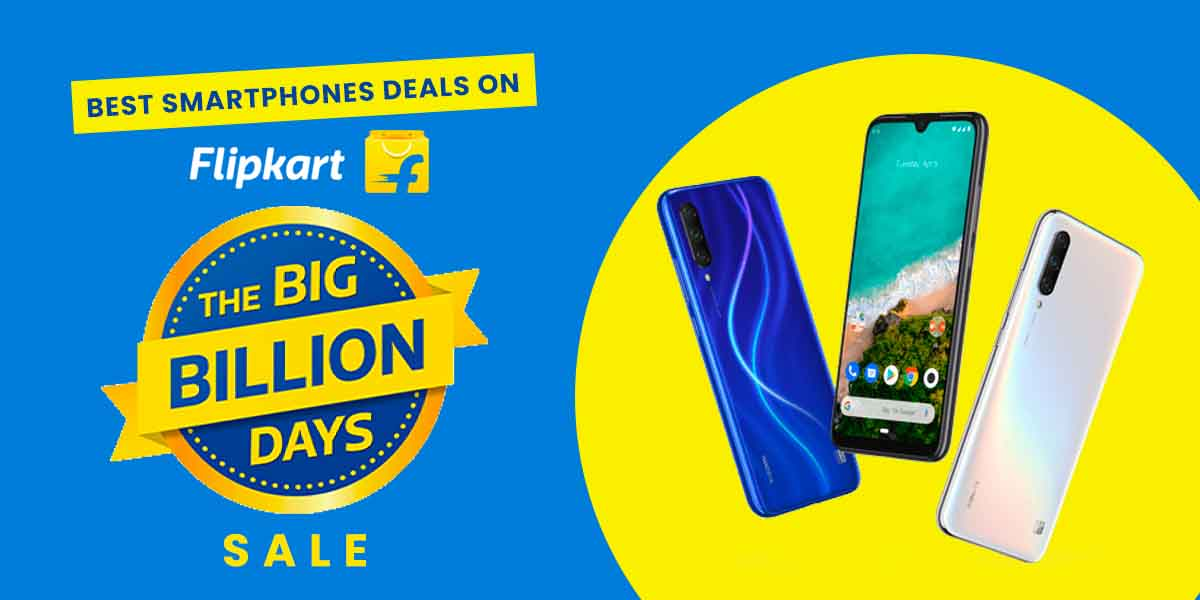

# Flipkart Mobile Customer Analysis

## Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df=pd.read_csv('Flipkart Mobile 2.csv')
df

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


## Know your Dataset

In [3]:
df.head(5)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
df.tail(5)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77
429,Xiaomi,Redmi 6 Pro,Blue,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,8190,0.36,1.53


In [5]:
df.shape

(430, 16)

In [6]:
df.size

6880

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [8]:
df.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [9]:
df["ROM"].mean()

105.74883720930232

### How many Mobile Brands are there ?

In [10]:
df["brand"].unique()

array(['Apple', 'Poco', 'Realme', 'Samsung', 'Xiaomi'], dtype=object)

#### Get Separate them all one by one

#### Group By Brand

In [11]:
branddf = df.groupby("brand")
branddf.groups

{'Apple': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], 'Poco': [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111], 'Realme': [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, ...], 'Samsung': 

In [12]:
appledf = branddf.get_group("Apple")
appledf.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [13]:
pocodf = branddf.get_group("Poco")
pocodf.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
56,Poco,C3,Black,MediaTek,Large,64,4,6.5,3,1,5000,4.3,38496,8999,0.18,34.64
57,Poco,M3,Blue,Qualcomm,Large,64,4,6.5,3,1,6000,4.3,4687,10999,0.08,5.16
58,Poco,M2 Reloaded,Blue,MediaTek,Large,64,4,6.5,4,1,5000,4.3,14878,9999,0.16,14.88
59,Poco,C3,Blue,MediaTek,Large,32,3,6.5,3,1,5000,4.3,54470,7999,0.20,43.57
60,Poco,M3,Black,Qualcomm,Large,64,6,6.5,3,1,6000,4.3,39881,11999,0.07,47.85


In [14]:
realmedf = branddf.get_group("Realme")
realmedf.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
112,Realme,C20,Blue,MediaTek,Large,32,2,6.5,1,1,5000,4.4,97955,7499,0.06,73.46
113,Realme,C20,Gray,MediaTek,Large,32,2,6.5,1,1,5000,4.4,97955,7499,0.06,73.46
114,Realme,C11 2021,Gray,Others,Large,32,2,6.5,1,1,5000,4.3,4850,7299,0.08,3.54
115,Realme,C11 2021,Blue,Others,Large,32,2,6.5,1,1,5000,4.3,4850,7299,0.08,3.54
116,Realme,C21Y,Black,Others,Large,64,4,6.5,3,1,5000,4.4,4906,9999,0.09,4.91


In [15]:
samsungdf = branddf.get_group("Samsung")
samsungdf.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
250,Samsung,Galaxy F22,Black,MediaTek,Medium,64,4,6.4,4,1,6000,4.3,3793,12999,0.13,4.93
251,Samsung,Galaxy F22,Blue,MediaTek,Medium,64,4,6.4,4,1,6000,4.3,3793,12999,0.13,4.93
252,Samsung,Galaxy F22,Blue,MediaTek,Medium,128,6,6.4,4,1,6000,4.3,1545,14999,0.11,2.32
253,Samsung,Galaxy F22,Black,MediaTek,Medium,128,6,6.4,4,1,6000,4.3,1545,14999,0.11,2.32
254,Samsung,Galaxy F12,Blue,Exynos,Large,64,4,6.5,4,1,6000,4.2,15016,11499,0.11,17.27


In [16]:
xiaomidf = branddf.get_group("Xiaomi")
xiaomidf.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
369,Xiaomi,Redmi 9A,Black,MediaTek,Large,32,3,6.5,1,1,5000,4.3,8459,8394,0.06,7.10
370,Xiaomi,Mi 11X,White,Qualcomm,Large,128,6,6.7,3,1,4520,4.3,194,24398,0.06,0.47
371,Xiaomi,Redmi 8A Dual,White,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77
372,Xiaomi,Mi A3,Blue,Qualcomm,Medium,64,4,6.1,3,1,4030,4.3,12458,12990,0.13,16.18
373,Xiaomi,Redmi 9,Blue,MediaTek,Large,128,4,6.5,2,1,5000,4.2,6870,10990,0.08,7.55


#### How much is count  for each brand ?

In [17]:
x1 = df["brand"].value_counts()
x1

brand
Realme     138
Samsung    119
Xiaomi      61
Apple       56
Poco        56
Name: count, dtype: int64

#### Find out how many models having each brand

In [18]:
appledf["model"].value_counts()

model
iPhone XR         18
iPhone 12         17
iPhone 12 Mini    16
iPhone SE          3
iPhone 8           1
iPhone 7 Plus      1
Name: count, dtype: int64

In [19]:
pocodf["model"].value_counts()

model
M3             9
M2 Pro         9
C3             6
X3 Pro         6
F3 GT          6
X3             6
M3 Pro 5G      5
M2             4
M2 Reloaded    2
F1             2
X2             1
Name: count, dtype: int64

In [20]:
realmedf['model'].value_counts()

model
GT Master Edition    9
X3 SuperZoom         6
7 Pro                6
Narzo 30             6
3i                   6
5 Pro                6
8 5G                 6
8 Pro                6
X7 Max               6
8                    6
X7 5G                4
Narzo 30 Pro 5G      4
C25                  4
C11 2021             4
Narzo 20             4
C2                   4
7                    4
C15                  4
Narzo 30A            4
C21                  4
Narzo 30 5G          4
X3                   3
GT 5G                3
Narzo 10A            3
6                    3
Narzo 20A            2
C20                  2
C11                  2
X7 Pro 5G            2
Narzo 20 Pro         2
C12                  2
8s 5G                2
C21Y                 2
Narzo 10             2
6i                   1
Name: count, dtype: int64

In [21]:
samsungdf['model'].value_counts()

model
Galaxy A21s                7
Galaxy F62                 6
Galaxy F12                 6
Galaxy F41                 6
Galaxy A03s                6
Galaxy A20s                5
Galaxy F02s                5
Galaxy A51                 5
Galaxy A12                 5
Galaxy F22                 4
Galaxy M02                 4
Galaxy A52s 5G             4
Galaxy Z Flip3 5G          4
Galaxy A22 5G              4
Galaxy A52                 3
Galaxy S20 FE              3
Galaxy Z Fold3 5G          3
Galaxy Note 20             3
Galaxy A50s                2
Galaxy Note 20 Ultra 5G    2
Galaxy M01                 2
Galaxy Grand 2             2
Galaxy J7 - 6              2
Galaxy A71                 2
Galaxy A72                 2
Galaxy M31                 2
Galaxy M32                 2
M02s                       2
Galaxy A31                 2
Galaxy M11                 1
Galaxy S21 Plus            1
Galaxy S21                 1
Galaxy Note10 Lite         1
Galaxy M30s                1
Galaxy M

In [22]:
xiaomidf['model'].value_counts()

model
Redmi 6 Pro         6
Mi 11 Lite          6
Redmi Note 7 Pro    6
Redmi Note 6 Pro    5
Redmi Note 9 Pro    4
Redmi 9             3
Mi A3               3
Mi 10T              3
Redmi Y3            3
Mi 10i              2
Redmi 8A Dual       2
Redmi Note 5 Pro    2
Redmi Note 7        2
Mi 11X              2
Redmi K20           2
Mi 10               1
Redmi 6A            1
Mi A1               1
Mi 11X Pro 5G       1
Redmi 9A            1
Redmi Y2            1
Mi 10T Pro          1
Redmi Note 5        1
Redmi Note 4        1
Redmi 5             1
Name: count, dtype: int64

#### Find out uniques models for each brand

In [23]:
appledf["model"].unique()

array(['iPhone SE', 'iPhone 12 Mini', 'iPhone XR', 'iPhone 12',
       'iPhone 8', 'iPhone 7 Plus'], dtype=object)

In [24]:
appledf["model"].nunique()

6

In [25]:
pocodf["model"].unique()

array(['C3', 'M3', 'M2 Reloaded', 'X3 Pro', 'M3 Pro 5G', 'M2 Pro',
       'F3 GT', 'X3', 'F1', 'M2', 'X2'], dtype=object)

In [26]:
pocodf["model"].nunique()

11

In [27]:
realmedf["model"].unique()

array(['C20', 'C11 2021', 'C21Y', 'Narzo 30 5G', 'C21', 'Narzo 30',
       '8s 5G', 'Narzo 30A', '8 5G', '8 Pro', 'C15', '8',
       'GT Master Edition', 'X7 5G', '7', 'Narzo 30 Pro 5G', 'C12', 'C11',
       'X7 Max', 'GT 5G', '5 Pro', '3i', 'Narzo 20 Pro', '7 Pro',
       'X3 SuperZoom', 'X7 Pro 5G', 'C2', 'X3', '6', '6i', 'C25',
       'Narzo 20', 'Narzo 10A', 'Narzo 20A', 'Narzo 10'], dtype=object)

In [28]:
realmedf["model"].nunique()

35

In [29]:
samsungdf["model"].unique()

array(['Galaxy F22', 'Galaxy F12', 'M02s', 'Galaxy M02', 'Galaxy A22',
       'Galaxy A52s 5G', 'Galaxy M32', 'Galaxy Z Flip3 5G',
       'Galaxy A22 5G', 'Galaxy A21s', 'Galaxy A03s', 'Galaxy M31',
       'Galaxy A51', 'Galaxy A72', 'Galaxy A12', 'Galaxy F62',
       'Galaxy A31', 'Galaxy A52', 'Galaxy F02s', 'Galaxy M11',
       'Galaxy F41', 'Galaxy A71', 'Galaxy Note 20', 'Galaxy Z Fold3 5G',
       'Galaxy M01', 'Galaxy A50s', 'Galaxy Note 20 Ultra 5G',
       'Galaxy S20 FE', 'Galaxy Grand 2', 'Galaxy Fold 2', 'Galaxy A7',
       'Galaxy J6', 'Galaxy J7 - 6', 'Galaxy A10', 'Galaxy A20',
       'Galaxy A80', 'Galaxy S21 Plus', 'Galaxy M42', 'Galaxy M30s',
       'Galaxy A20s', 'Galaxy Note10 Lite', 'Galaxy S21', 'Galaxy S10'],
      dtype=object)

In [30]:
samsungdf["model"].nunique()

43

In [31]:
xiaomidf["model"].unique()

array(['Redmi 9A', 'Mi 11X', 'Redmi 8A Dual', 'Mi A3', 'Redmi 9',
       'Mi 11 Lite', 'Redmi Note 7 Pro', 'Mi 10i', 'Redmi Note 6 Pro',
       'Redmi Note 9 Pro', 'Redmi Note 5 Pro', 'Redmi Note 7', 'Redmi Y3',
       'Redmi K20', 'Redmi Note 4', 'Redmi Note 5', 'Mi 10T',
       'Mi 10T Pro', 'Redmi Y2', 'Mi 10', 'Redmi 6 Pro', 'Mi 11X Pro 5G',
       'Mi A1', 'Redmi 6A', 'Redmi 5'], dtype=object)

In [32]:
xiaomidf["model"].nunique()

25

### Analysing the sales column 

- In our dataset we having column  **sales_price** which shows sale price of perticular model.
- and we have another column **sales** having values in crores so we can Convert sales values from crores to actual revenue generated

In [33]:
df['revenue']= (df['sales']* 10000000).round().astype(int)
df.head(5)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,revenue
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39,13900000
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07,230700000
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15,51500000


- from this now we can calculate number of units sold for each model

In [34]:
#Divide revenue generated by sales price to get units sold

df['units_sold']= (df['revenue']/df['sales_price']).round().astype(int)
df.head(5)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,revenue,units_sold
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000,38644
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39,13900000,243
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000,38644
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07,230700000,5365
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15,51500000,745


In [35]:
df.units_sold.sum()

7376835

In [36]:
print('sales generated in crocres',df.sales.sum(),"cr")

sales generated in crocres 12793.5 cr


In [37]:
df.revenue.sum()/10000000

9623.848176

#### 1.	Find out how many brands are there having most of the sales.

In [38]:
sales = branddf.sales.sum()
sales

brand
Apple      1091.27
Poco       2437.32
Realme     4301.91
Samsung    1261.90
Xiaomi     3701.10
Name: sales, dtype: float64

Text(0, 0.5, 'Sales in Cr')

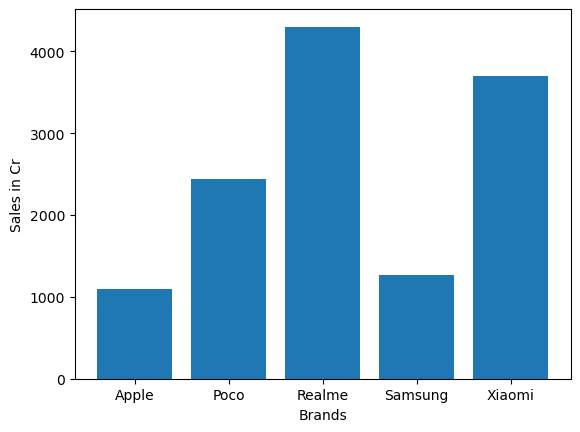

In [39]:
plt.bar(sales.index,sales)
plt.xlabel('Brands')
plt.ylabel('Sales in Cr')

- **Realme is Dominated** 
From this we can say that **Realme** generate more sales 

#### 2.	How many models are sold by each brand?

In [40]:
sold_models = branddf.model.count()
sold_models

brand
Apple       56
Poco        56
Realme     138
Samsung    119
Xiaomi      61
Name: model, dtype: int64

<BarContainer object of 5 artists>

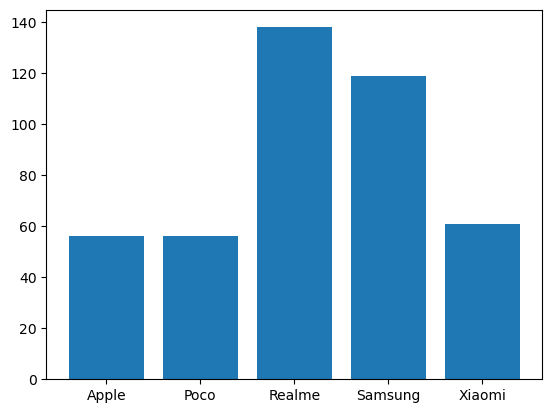

In [41]:
plt.bar(sold_models.index,sold_models)

#### we can also find out how many unique models sold by each brand

In [42]:
unique_models=branddf.model.nunique()
unique_models

brand
Apple       6
Poco       11
Realme     35
Samsung    43
Xiaomi     25
Name: model, dtype: int64

<Axes: xlabel='brand'>

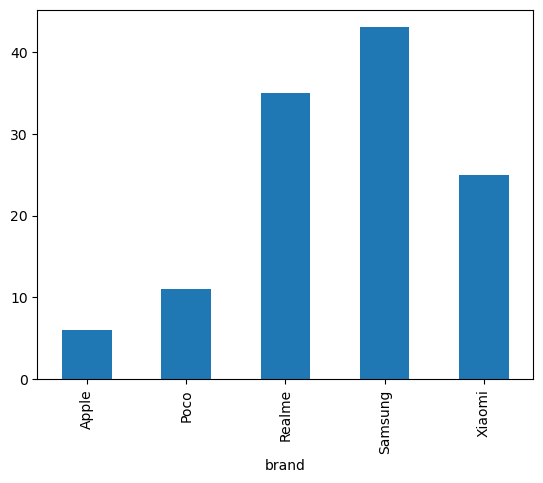

In [43]:
unique_models.plot(kind='bar')

- **Realme's Models are Dominance**: Realme's total sales volume across its models is higher compared to any other brand in the dataset. This indicates that Realme is very successful in selling its existing models.
- **Samsung's Model Diversity**: Even though Realme leads in total sales, Samsung offers a wider range of distinct smartphone models. This suggests that Samsung has a more diverse product portfolio, with a variety of models catering to different market segments or consumer preferences.

#### 3.	What is the average discount given by brands on their models?


To create the actual discount value from the "discount_percent" column, we can simply calculate it as a percentage of the sales price. 

In [44]:
df['actual_discount']= df['sales_price']*df['discount_percent']

In [45]:
df

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,revenue,units_sold,actual_discount
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000,38644,5609.83
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39,13900000,243,2285.96
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000,38644,5609.83
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07,230700000,5365,4299.90
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15,51500000,745,1382.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50,15000000,1875,2399.70
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73,17300000,1784,2715.72
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42,34200000,1555,2639.88
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77,67700000,8158,580.93


In [46]:
avg_discount = df.groupby('brand').actual_discount.mean()
avg_discount

brand
Apple      3353.346429
Poco       2625.016429
Realme     1315.306884
Samsung    4170.121092
Xiaomi     1600.749180
Name: actual_discount, dtype: float64

Text(0, 0.5, 'Average Discount Price')

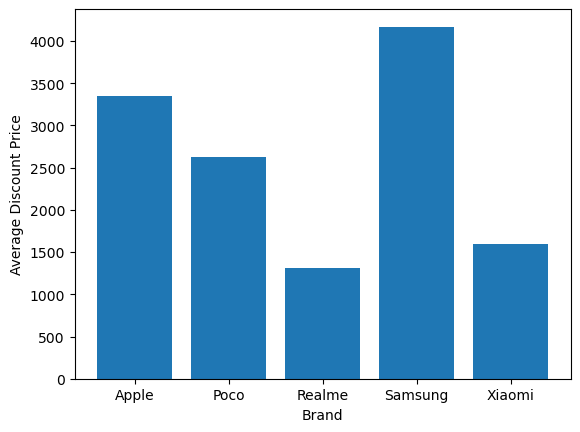

In [47]:
plt.bar(avg_discount.index,avg_discount)
plt.xlabel('Brand')
plt.ylabel('Average Discount Price')

- **Samsung's** higher average discount may reflect its positioning in the market. 
- By offering more significant discounts, Samsung could be targeting a broader customer base, including price-sensitive consumers who are attracted to discounts and promotions.
- Offering higher average discounts can make Samsung's products more appealing to consumers,

#### 4.	What size of display did customers like the most?

In [48]:
screen= df.screen_size.value_counts()
screen

screen_size
Large         242
Medium        146
Small          34
Very Small      4
Very Large      4
Name: count, dtype: int64

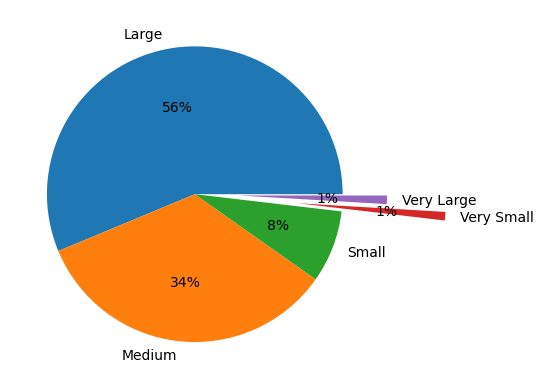

In [49]:
plt.pie(screen, labels=screen.index, autopct='%0.f%%',explode=[0,0,0,0.7,0.3])
plt.show()


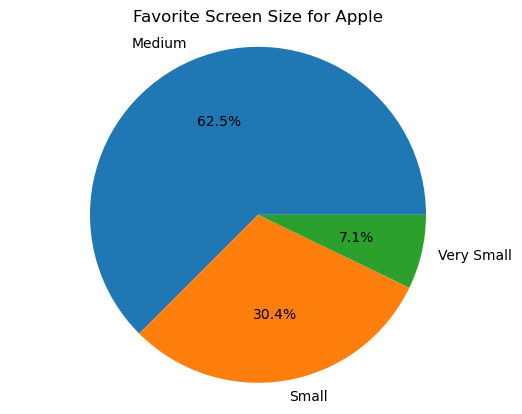

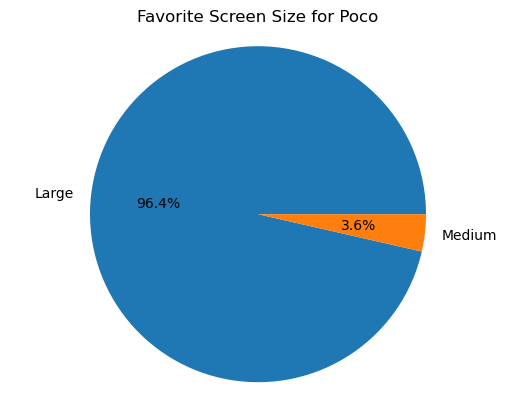

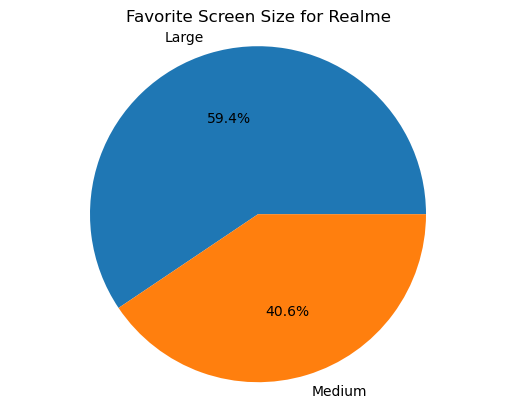

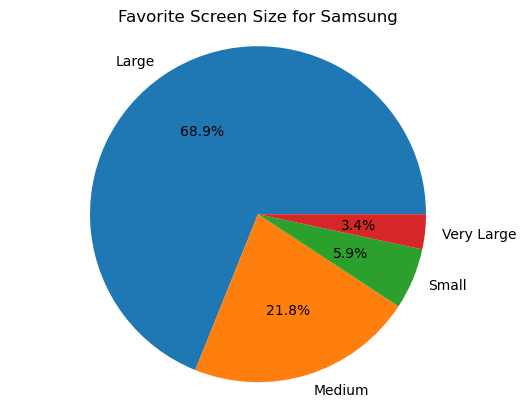

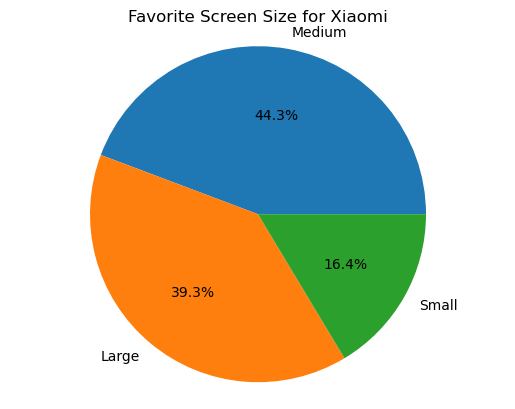

In [50]:
#'branddf' is grouped DataFrame containing data grouped by brand
# Iterate over each brand

for brand, brand_df in branddf:
    # Filter DataFrame for the current brand
    brand_screen_sizes = brand_df['screen_size']
    screen_size_counts = brand_screen_sizes.value_counts()    # Calculate the counts of each screen size
    
    # Plot pie chart for the current brand
    #plt.figure(figsize=(6, 6))
    plt.pie(screen_size_counts, labels=screen_size_counts.index, autopct='%1.1f%%', startangle=0)
    plt.title(f'Favorite Screen Size for {brand}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


In [51]:
df.display_size.value_counts()

display_size
6.5    164
6.4     64
6.7     62
6.1     43
6.3     22
5.4     16
6.6     14
6.2     12
5.8      6
5.5      6
6.0      5
7.6      4
4.7      4
5.7      3
6.9      2
5.2      2
5.6      1
Name: count, dtype: int64

#### 5.	Which are the favorite colors of mobile phone customers?

In [52]:
color = df['base_color'].value_counts()
color

base_color
Blue      117
Black     112
White      44
Silver     32
Others     28
Green      24
Red        21
Gray       20
Yellow     11
Gold       11
Purple      5
Bronze      5
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

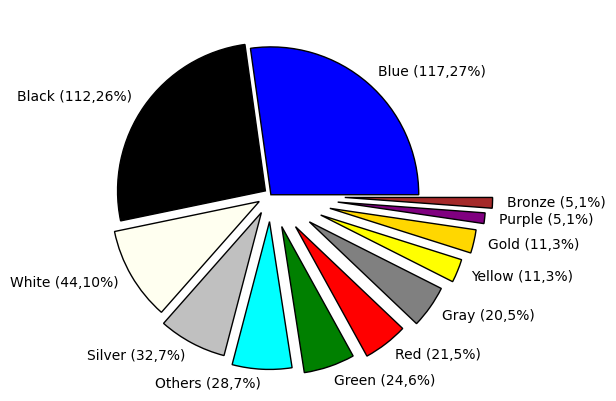

In [53]:
autopct_color='orange'
combined_labels = [f"{label} ({size},{size/430*100:.0f}%)" for label, size in zip(color.index, color)]
c1=['blue','black','ivory','silver','cyan','green','red','grey','yellow','gold','purple','brown']
plt.pie(color,labels=combined_labels, colors=c1,explode=np.linspace(0,0.5,12) ,wedgeprops={'edgecolor':'k'})
plt.show

In [54]:
branddf['base_color'].value_counts()

brand    base_color
Apple    Black         12
         White         11
         Blue           8
         Red            7
         Green          6
         Others         4
         Purple         4
         Yellow         3
         Gold           1
Poco     Blue          18
         Black         17
         Yellow         5
         Others         3
         Red            3
         Silver         3
         Gray           3
         Bronze         2
         Green          2
Realme   Blue          43
         Black         26
         Silver        24
         White         16
         Gray           9
         Others         9
         Green          5
         Yellow         3
         Red            2
         Purple         1
Samsung  Black         38
         Blue          33
         Green         10
         White         10
         Others         9
         Gray           7
         Red            4
         Silver         3
         Bronze         3
         Gold     

#### 6.	Which processors are the most favorable for customers?

In [55]:
pro = df['processor'].value_counts()
pro

processor
Qualcomm    168
MediaTek    144
Exynos       53
Ceramic      33
iOS          12
Water        11
Others        9
Name: count, dtype: int64

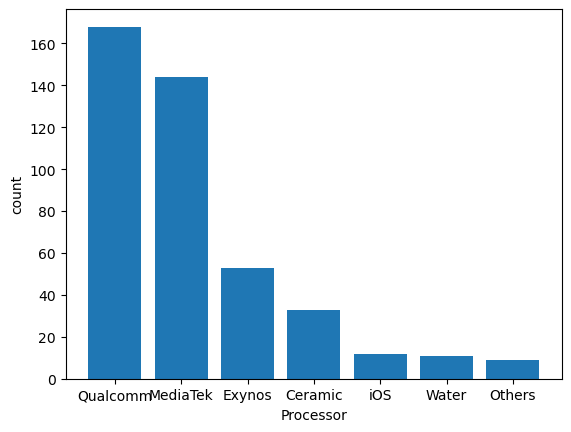

In [56]:
plt.bar(pro.index,pro)
plt.xlabel('Processor')
plt.ylabel('count')
plt.show()

In [57]:
branddf.processor.value_counts()

brand    processor
Apple    Ceramic      33
         iOS          12
         Water        11
Poco     Qualcomm     33
         MediaTek     23
Realme   MediaTek     91
         Qualcomm     41
         Others        6
Samsung  Exynos       53
         Qualcomm     38
         MediaTek     25
         Others        3
Xiaomi   Qualcomm     56
         MediaTek      5
Name: count, dtype: int64

#### 7.	Find out mobile phones at various price ranges. which budget range do customers choose mostly?

In [58]:
df

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,revenue,units_sold,actual_discount
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000,38644,5609.83
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39,13900000,243,2285.96
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,1275200000,38644,5609.83
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07,230700000,5365,4299.90
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15,51500000,745,1382.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50,15000000,1875,2399.70
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73,17300000,1784,2715.72
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42,34200000,1555,2639.88
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77,67700000,8158,580.93


(array([191.,  72.,  29.,  22.,   7.,  16.,  16.,   4.,   2.,   0.]),
 array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
         80000.,  90000., 100000., 120000.]),
 <BarContainer object of 10 artists>)

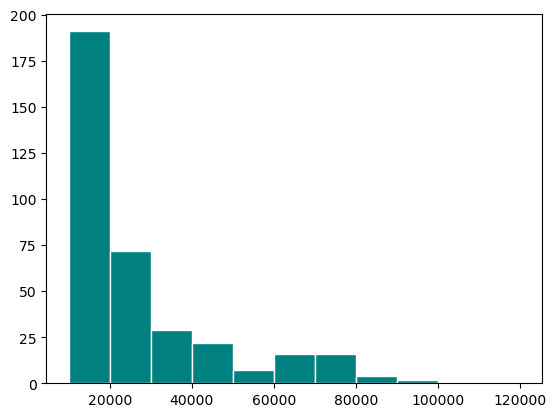

In [59]:
plt.hist(df.sales_price, bins=[10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000],ec='w',color='teal' )

Majority of customers buy mobile phones within a range of 10000 to 20000 which are **budget-friendly smartphones** 

#### 8.	Which are the top 10 models by avg sales

In [60]:
avg_sales_by_model = df.groupby('model')['sales'].mean()
avg_sales_by_model

model
3i                 28.195000
5 Pro              27.838333
6                  72.176667
6i                 78.020000
7                  67.975000
                     ...    
iPhone 12 Mini      1.569375
iPhone 7 Plus     109.940000
iPhone 8           43.990000
iPhone SE         127.520000
iPhone XR          24.415000
Name: sales, Length: 119, dtype: float64

In [61]:
top_10_models = avg_sales_by_model.sort_values(ascending=False).head(10)
top_10_models

model
Redmi Note 4        550.190
Mi A1               493.980
X2                  427.220
Redmi Note 5        392.730
Redmi Note 5 Pro    174.395
C11                 167.730
C12                 139.700
Narzo 20            136.495
F1                  131.320
iPhone SE           127.520
Name: sales, dtype: float64

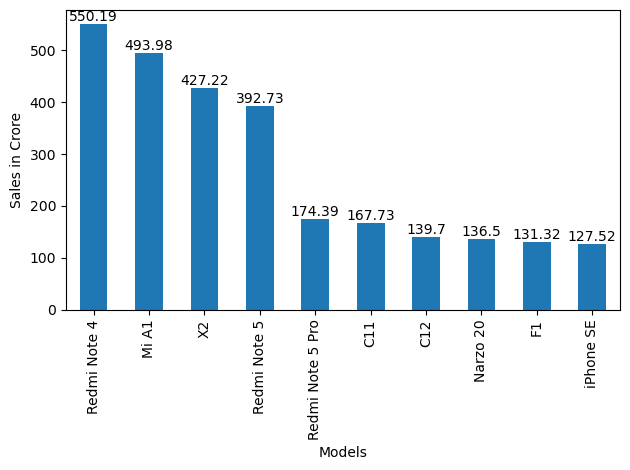

In [62]:
top_10_models.plot(kind = 'bar')
plt.xlabel('Models')
plt.ylabel('Sales in Crore')
for i, value in enumerate(top_10_models):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### 9.	What is Battery capacity by brand 

In [63]:
branddf.battery_capacity.value_counts()

brand    battery_capacity
Apple    2815                33
         2942                18
         1800                 5
Poco     5000                26
         6000                15
         5160                 6
         5065                 6
         4000                 2
         4500                 1
Realme   5000                53
         4500                25
         6000                18
         4300                13
         4200                 9
         4230                 6
         4035                 6
         4310                 4
         4000                 4
Samsung  5000                40
         6000                21
         4500                16
         4000                16
         3300                 7
         7000                 6
         4300                 3
         4400                 3
         3400                 2
         2600                 2
         3000                 1
         4800                 1
         3700 

#### 10.	How much sales created by each brand ?

In [64]:
s = branddf.sales.max()
s

brand
Apple      127.52
Poco       427.22
Realme     167.73
Samsung     98.89
Xiaomi     550.19
Name: sales, dtype: float64

<Axes: ylabel='sales'>

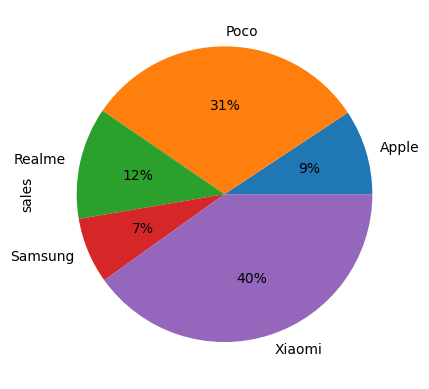

In [65]:
s.plot(kind = "pie", autopct="%0.f%%")

**Xiaomi** generate **40%** of maximum sales as compared to other brands

## Conclusion of Flipkart Mobile Analysis Project
Analyzing Flipkart's mobile phone sales data has provided valuable insights into customer preferences and behaviors. Here's a summary of the findings based on the problem statements provided:

#### Most Popular Brands:

The data shows a few brands dominate the sales, capturing the majority of the market share. These top brands have established strong customer loyalty and brand recognition.

#### Number of Models Sold by Each Brand:

Brands with a wide variety of models tend to attract more customers by catering to different preferences and price ranges. The top brands offer a diverse range of models, contributing to their high sales figures.

#### Average Discount Given by Brands:

Discount strategies vary across brands, but overall, offering competitive discounts is a common practice to boost sales. The average discount percentage can indicate how aggressively a brand is trying to attract price-sensitive customers.

#### Most Preferred Display Size:

Customers show a clear preference for certain display sizes, with mid-sized screens being the most popular. This indicates a balanced demand for portability and screen real estate.

#### Favorite Colors of Mobile Phone Customers:

Certain colors, such as black and blue, emerge as favorites among customers. These preferences can guide brands in deciding which color variants to prioritize in production and marketing.

#### Most Favorable Processors:

Processors from well-known manufacturers like Qualcomm and MediaTek are highly favored, reflecting customer preference for performance and reliability.

#### Price Range Preferences:

The analysis reveals that customers predominantly choose mobile phones within a specific budget range, highlighting the importance of affordability. Mid-range phones often strike the best balance between features and cost, making them the most popular.

#### Top 10 Models by Average Sales:

The top 10 models showcase a mix of features that are highly valued by customers, such as battery life, camera quality, and brand trust. These models serve as benchmarks for successful product offerings.

#### Battery Capacity by Brand:

Brands offering higher battery capacities tend to be more successful, as battery life remains a critical factor for many customers. This insight can help brands focus on enhancing battery performance in future models.

#### Sales Volume by Brand:

The sales volume analysis underscores the dominance of certain brands in the market. Brands with high sales volumes have effectively leveraged their brand reputation, product quality, and marketing strategies to capture significant market share.


#### Final Thoughts
The analysis of Flipkart's mobile phone sales data has provided actionable insights for understanding customer behavior. By recognizing the trends in brand preferences, display size, color choices, processor favorability, and price range preferences, brands can tailor their product offerings and marketing strategies to better meet customer needs. The findings highlight the importance of product variety, competitive pricing, and feature optimization in driving sales growth and customer satisfaction.